Алгоритм самонавчання

Спостерігається система, яка генерує послідовність незалежних нормально розподілених випадкових величин x1, ... , xn з дисперсією 1. Система може перебувати в одному з чотирьох станів k ∈ {0, 1, 2, 3}. Математичне сподівання кожної величини залежить від поточного стану системи та дорівнює ak = k коли система знаходиться у стані k, k ∈ {0, 1, 2, 3}. Ймовірність того, що система перебуває в стані k дорівнює (k+1)/10, k ∈ {0, 1, 2, 3}. 

Завдання:
1. Згенерувати послідовність n незалежних нормально розподілених випадкових величин з дисперсією 1 і математичним сподіванням, яке з ймовірністю (k+1)/10 дорівнює k, k ∈ {0, 1, 2, 3}.
2. За допомогою алгоритму самонавчання отримати оцінки ймовірностей pK(k) і параметрів ak, k ∈ {0, 1, 2, 3}. Умовою зупинки алгоритму вважати наступну: оцінки параметрів не змінились, а оцінки ймовірностей змінились менше ніж на 0.001. Алгоритм має працювати для довільного n. 
3. Проаналізувати поведінку алгоритму залежно від n і початкових оцінок ймовірностей і параметрів.

In [8]:
import numpy as np

def generate_sequence(n):
    probabilities = np.array([1/10, 2/10, 3/10, 4/10])
    
    states = np.array([0, 1, 2, 3])
    
    means = states
    
    sequence = []
    state_sequence = []
    for _ in range(n):
        state = np.random.choice(states, p=probabilities)
        state_sequence.append(state)
        x = np.random.normal(loc=means[state], scale=1)
        sequence.append(x)
    
    return np.array(sequence), np.array(state_sequence)

n = 100
sequence, state_sequence = generate_sequence(n)

sequence[:10]

array([2.97776354, 0.54253514, 4.10669153, 2.27866599, 1.92586078,
       2.13117234, 2.29843743, 1.84476717, 1.23990098, 0.97642995])

In [9]:
def self_learning_algorithm(sequence, n, max_iter=100, tol=0.001):
    p = np.array([0.1, 0.2, 0.3, 0.4])
    a = np.array([0.0, 1.0, 2.0, 3.0])

    for iteration in range(max_iter):
        gamma = np.zeros((n, 4))
        for i in range(n):
            for k in range(4):
                gamma[i, k] = p[k] * np.exp(-0.5 * (sequence[i] - a[k])**2)
            gamma[i] /= np.sum(gamma[i])

        p_new = np.mean(gamma, axis=0)

        a_new = np.array([np.sum(gamma[:, k] * (sequence - a[k])) / np.sum(gamma[:, k]) for k in range(4)])

        if np.max(np.abs(p_new - p)) < tol and np.max(np.abs(a_new - a)) < tol:
            print(f"Зупинка на ітерації {iteration+1}")
            break
        
        p = p_new
        a = a_new
    
    return p, a

p_estimated, a_estimated = self_learning_algorithm(sequence, n)

print("Оцінки ймовірностей:", p_estimated)
print("Оцінки параметрів:", a_estimated)

Оцінки ймовірностей: [0.22456286 0.30403505 0.201125   0.27027709]
Оцінки параметрів: [1.98358583 1.98358467 1.98358233 1.9835825 ]


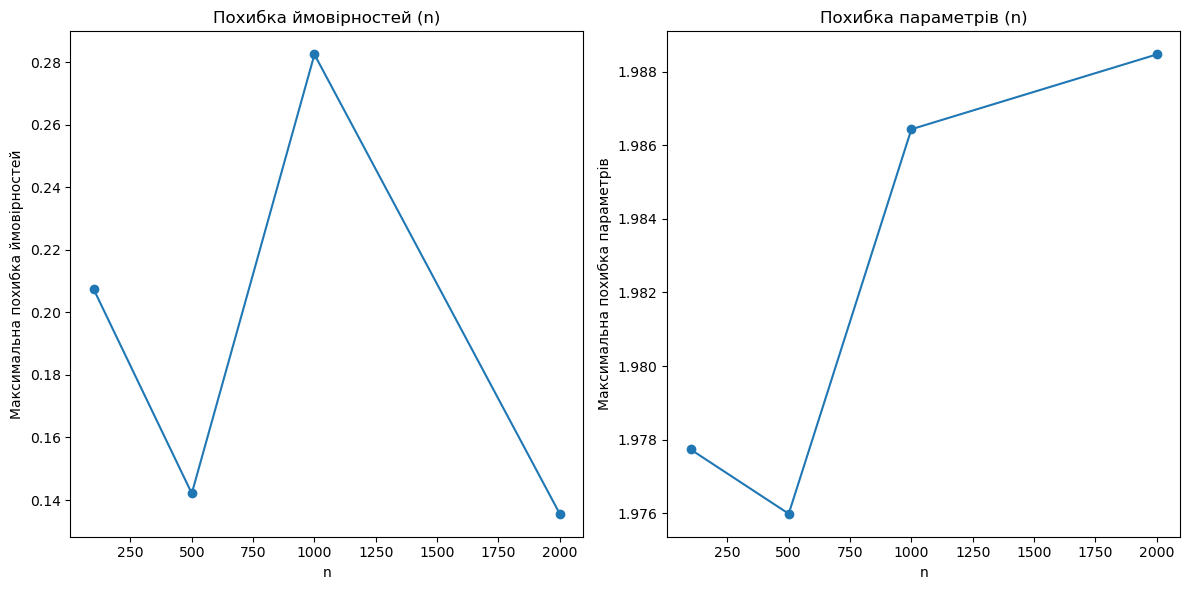

In [10]:
import matplotlib.pyplot as plt

def analyze_algorithm(n_values):
    iterations = []
    errors_p = []
    errors_a = []
    
    for n in n_values:
        sequence, state_sequence = generate_sequence(n)
        p_estimated, a_estimated = self_learning_algorithm(sequence, n)
        
        iterations.append(len(p_estimated))
        errors_p.append(np.max(np.abs(p_estimated - np.array([0.1, 0.2, 0.3, 0.4]))))
        errors_a.append(np.max(np.abs(a_estimated - np.array([0, 1, 2, 3]))))
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(n_values, errors_p, marker='o')
    plt.xlabel('n')
    plt.ylabel('Максимальна похибка ймовірностей')
    plt.title('Похибка ймовірностей (n)')
    
    plt.subplot(1, 2, 2)
    plt.plot(n_values, errors_a, marker='o')
    plt.xlabel('n')
    plt.ylabel('Максимальна похибка параметрів')
    plt.title('Похибка параметрів (n)')
    
    plt.tight_layout()
    plt.show()

n_values = [100, 500, 1000, 2000]
analyze_algorithm(n_values)